# What's Normal? -- Temperature, Gender, and Heart Rate

- We will study with a dataset on body temperature, gender, and heart rate. 
- We'll try to understand the concepts like 
    - true means, 
    - confidence intervals, 
    - t-statistics, 
    - t-tests, 
    - the normal distribution, and 
    - regression.
- Article: http://jse.amstat.org/v4n2/datasets.shoemaker.html
- Body temperature (degrees Fahrenheit)
- Gender (1 = male, 2 = female)
- Heart rate (beats per minute)

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
df = pd.read_csv('http://jse.amstat.org/datasets/normtemp.dat.txt', delim_whitespace=True, names=["temperature", "gender", "heart_rate"])

In [2]:
df

,temperature,gender,heart_rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73
...,...,...,...
125,99.3,2,68
126,99.4,2,77
127,99.9,2,79
128,100.0,2,78


Recode gender variable, name as "male" and "female"

In [8]:
df.gender = df.gender.apply(lambda x : "male" if x == 1 else "female")

In [9]:
df.gender

0        male
1        male
2        male
3        male
4        male
        ...  
125    female
126    female
127    female
128    female
129    female
Name: gender, Length: 130, dtype: object

## 1. Is the *body temperature* population mean  98.6 degrees F?

What is the sample mean?

In [10]:
df.temperature.mean()

98.24923076923076

What is the sample standard deviation?

In [11]:
df.temperature.std()

0.7331831580389456

What is the sample standard error of the mean?

In [12]:
df.temperature.std()/len(df)

0.005639870446453428

Plot the distribution of body temperature?

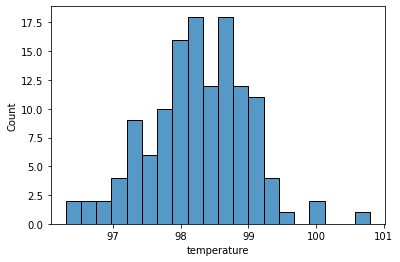

In [29]:
sns.histplot(x="temperature",data=df,bins=20);

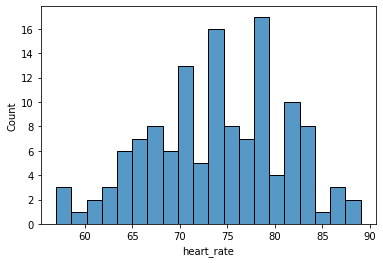

In [30]:
sns.histplot(x="heart_rate",data=df,bins=20);

Investigate this question by calculating the confidence interval for this sample of 130 subjects. (Use 90%, 95% and 99% CIs)

In [26]:
ci1 = stats.t.interval(0.9, len(df.temperature)-1, loc=df.temperature.mean(), scale=df.temperature.sem())
ci1

(98.14269432413488, 98.35576721432665)

In [27]:
ci2 = stats.t.interval(0.95, len(df.temperature)-1, loc=df.temperature.mean(), scale=df.temperature.sem())
ci2

(98.12200290560803, 98.3764586328535)

In [28]:
ci3 = stats.t.interval(0.99, len(df.temperature)-1, loc=df.temperature.mean(), scale=df.temperature.sem())
ci3

(98.08110824239758, 98.41735329606395)

Investigate this question by using one sample t test.

Check the normality

In [32]:
stats.shapiro(df.temperature)

ShapiroResult(statistic=0.9865769743919373, pvalue=0.2331680953502655)

In [ ]:
# pvalue is bigger than 0.05 so it is normal distributed 

In [33]:
stats.shapiro(df.heart_rate)

ShapiroResult(statistic=0.9885448217391968, pvalue=0.35503581166267395)

In [ ]:
# pvalue is bigger than 0.05 so it is normal distributed 

The sample standard deviation is .73, so the standard error of the mean is .064. Thus the calculated t (using the sample mean of 98.25) is -5.45.

In [34]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

In [ ]:
# pvalue is less than 0.05 so H0 is rejected

## 2. Is There a Significant Difference Between Males and Females in Normal Temperature?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

Show descriptives for 2 groups

In [40]:
male= df[df["gender"]=="male"]
male

,temperature,gender,heart_rate
0,96.3,male,70
1,96.7,male,71
2,96.9,male,74
3,97.0,male,80
4,97.1,male,73
...,...,...,...
60,99.1,male,71
61,99.2,male,83
62,99.3,male,63
63,99.4,male,70


In [41]:
female= df[df.gender=="female"]
female

,temperature,gender,heart_rate
65,96.4,female,69
66,96.7,female,62
67,96.8,female,75
68,97.2,female,66
69,97.2,female,68
...,...,...,...
125,99.3,female,68
126,99.4,female,77
127,99.9,female,79
128,100.0,female,78


Plot the histogram for both groups side-by-side.

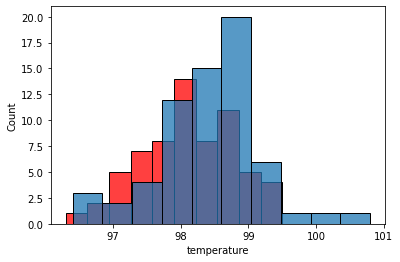

In [48]:
sns.histplot(x="temperature", data=male,bins=10,color="red")
sns.histplot(x="temperature", data=female,bins=10);

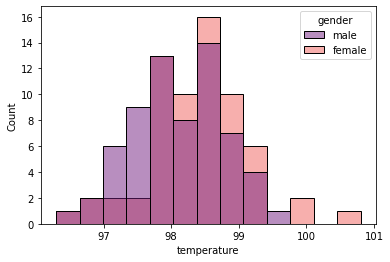

In [50]:
sns.histplot(x="temperature", data=df, hue="gender",palette="magma");

Plot the box plot for both groups side-by-side.

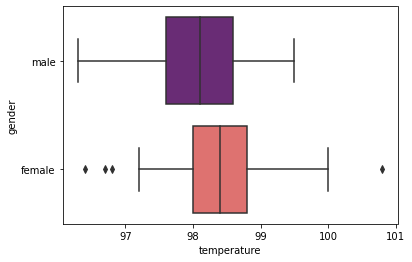

In [58]:
sns.boxplot(x="temperature", y="gender", data=df,palette="magma");

In [55]:
df

,temperature,gender,heart_rate
0,96.3,male,70
1,96.7,male,71
2,96.9,male,74
3,97.0,male,80
4,97.1,male,73
...,...,...,...
125,99.3,female,68
126,99.4,female,77
127,99.9,female,79
128,100.0,female,78


Check the normality for male group

In [59]:
stats.shapiro(male.temperature)

ShapiroResult(statistic=0.9894071817398071, pvalue=0.8545167446136475)

In [ ]:
# pvalue is bigger than 0.05 so it is normal distributed 

Check the normality for female group

In [60]:
stats.shapiro(female.temperature)

ShapiroResult(statistic=0.9679745435714722, pvalue=0.09016574919223785)

In [ ]:
# pvalue is bigger than 0.05 so it is normal distributed 

Test the assumption of homogeneity of variance
*Hint: Levene’s Test*

The hypotheses for Levene’s test are: 

<i>H<i/><sub>0</sub>: "the population variances of group 1 and 2 are equal"
    
<i>H<i/><sub>1</sub>: "the population variances of group 1 and 2 are not equal"

In [61]:
stats.levene(male.temperature,female.temperature)

LeveneResult(statistic=0.06354951292025163, pvalue=0.8013756068102883)

In [ ]:
# Fail To Reject H0: "the population variances of group 1 and 2 are equal"  

Calculate test statistic and p-value.

In [62]:
stats.ttest_ind(male.temperature,female.temperature,equal_var=True)

Ttest_indResult(statistic=-2.2854345381654984, pvalue=0.02393188312240236)

In [ ]:
# Reject To H0 Hipothesis mu_1 != mu_2

## 3. Is There a Relationship Between Body Temperature and Heart Rate?

Plot the scatter plot

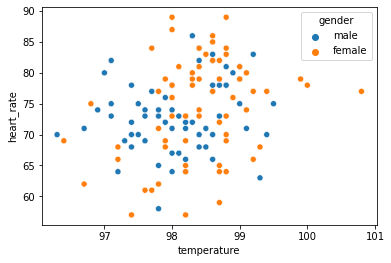

In [65]:
sns.scatterplot(x="temperature", y="heart_rate", data=df,hue="gender");

Check the normality for heart rate variable

In [67]:
stats.shapiro(female.heart_rate)

ShapiroResult(statistic=0.9720652103424072, pvalue=0.14828649163246155)

In [ ]:
# pvalue is bigger than 0.05 so it is normal distributed 

In [68]:
stats.shapiro(male.heart_rate)

ShapiroResult(statistic=0.9881355166435242, pvalue=0.7911732196807861)

In [ ]:
# pvalue is bigger than 0.05 so it is normal distributed 

Conduct a correllation test, report Pearson’s correlation coefficient and two-tailed p-value.

Two-tailed significance test:

H0: ρ = 0 ("the population correlation coefficient is 0; there is no association")

H1: ρ ≠ 0 ("the population correlation coefficient is not 0; a nonzero correlation could exist")

In [70]:
stats.pearsonr(df.temperature, df.heart_rate)

(0.2536564027207642, 0.003591489250708227)

In [72]:
# H1: ρ ≠ 0 ("the population correlation coefficient is not 0; a nonzero correlation could exist")

Find a regression equation to predict heart rate from body temperature.

In [73]:
stats.linregress(df.temperature, df.heart_rate)

LinregressResult(slope=2.443238038611884, intercept=-166.2847194182033, rvalue=0.25365640272076423, pvalue=0.003591489250708224, stderr=0.823519020914422)

In [ ]:
# y = B_0 + B_1*x
# y = -166 + 2.44*x

Calculate the predicted heart rate of a person at the temperature 97 F.

In [74]:
y = -166 + 2.44*97
y

70.68

How much of the variation of the heart_rate variable is explained by the temperature variable? *Coefficient of determination (R-squared):*

In [76]:
a = stats.linregress(df.temperature, df.heart_rate)
a.rvalue

0.25365640272076423

In [77]:
a.rvalue**2

0.06434157064123852

# Spring 2014 Semester Survey

In [81]:
#change the link
survey = pd.read_csv('university_survey_2014.csv')
survey.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,,,,,0,0,72.35,,...,88.24,81.5,60.02,81.44,In state,1,,,7,1
1,20278,1/1/1995,,,,Philosophy,0,0,70.66,179.2,...,89.45,85.25,70.19,73.27,,1,,,5,2
2,20389,12/31/1994,,,,,0,0,70.68,198.52,...,96.73,86.88,71.2,84.24,In state,,,,8,7
3,22820,12/1/1994,,,,business administration,1,0,,198.34,...,74.06,88.68,55.89,73.16,In state,1,,,2,6
4,24559,11/10/1994,,,,,1,1,67.43,128.17,...,82.61,77.3,65.52,80.45,Out of state,1,,,7,3


Know your data

In [82]:
survey.describe()

,ids,Athlete
count,435.000000,435.000000
mean,35279.022989,0.422989
std,8637.733605,0.494602
min,20183.000000,0.000000
25%,28001.000000,0.000000
50%,35350.000000,0.000000
75%,42655.500000,1.000000
max,49947.000000,1.000000


In [85]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ids           435 non-null    int64 
 1   bday          435 non-null    object
 2   enrolldate    435 non-null    object
 3   expgradate    435 non-null    object
 4   Rank          435 non-null    object
 5   Major         434 non-null    object
 6   Gender        435 non-null    object
 7   Athlete       435 non-null    int64 
 8   Height        435 non-null    object
 9   Weight        435 non-null    object
 10  Smoking       435 non-null    object
 11  Sprint        435 non-null    object
 12  MileMinDur    435 non-null    object
 13  English       435 non-null    object
 14  Reading       435 non-null    object
 15  Math          435 non-null    object
 16  Writing       435 non-null    object
 17  State         435 non-null    object
 18  LiveOnCampus  435 non-null    object
 19  HowCommu

## Paired Samples t Test

The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the **English** and **Math** sections, and want to determine whether students tended to score higher on their English or Math test, on average. 

Show descriptives for 2 sections

In [93]:
survey["Math"] = pd.to_numeric(survey["Math"],errors='coerce')
survey["English"] = pd.to_numeric(survey["English"],errors='coerce')
survey["Reading"] = pd.to_numeric(survey["Reading"],errors='coerce')
survey["Writing"] = pd.to_numeric(survey["Writing"],errors='coerce')

In [94]:
survey.English.describe()

count    409.000000
mean      82.787555
std        6.839803
min       59.830000
25%       78.330000
50%       83.150000
75%       87.170000
max      101.950000
Name: English, dtype: float64

In [95]:
survey["Math"].describe()

count    422.000000
mean      65.468009
std        8.375930
min       35.320000
25%       60.202500
50%       65.445000
75%       70.567500
max       93.780000
Name: Math, dtype: float64

Plot the histogram for both groups side-by-side.

In [96]:
survey.describe()[["English", "Math"]]

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


In [108]:
pairset = survey[["English","Math"]].dropna()

Plot the box plot for both variables side-by-side.

<AxesSubplot:>

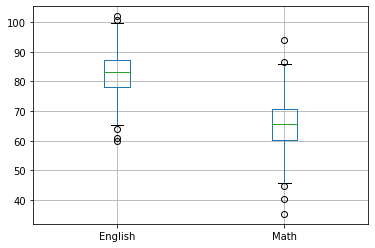

In [109]:
pairset.boxplot()

Run dependent t test

In [110]:
stats.ttest_rel(pairset.English,pairset.Math)

Ttest_relResult(statistic=36.312568981719856, pvalue=3.0710987192210606e-128)

Compute pairwise correlation of sections (English, Reading, Math, and Writing), excluding NA/null values.

# One-way ANOVA

In the sample dataset, the variable Sprint is the respondent's time (in seconds) to sprint a given distance, and Smoking is an indicator about whether or not the respondent smokes (0 = Nonsmoker, 1 = Past smoker, 2 = Current smoker). Let's use ANOVA to test if there is a statistically significant difference in sprint time with respect to smoking status. Sprint time will serve as the dependent variable, and smoking status will act as the independent variable.

The null and alternative hypotheses of one-way ANOVA can be expressed as:

H0: µ1 = µ2 = µ3  = ...   = µk   ("all k population means are equal")

H1: At least one µi different  ("at least one of the k population means is not equal to the others")

Data Manipulation and Recoding

Check normality assumption for each group

Run One-way ANOVA